https://github.com/mohamadnajjari

About the project:

An investment prediction model is a statistical or machine learning model that aims to forecast the future performance of investments, such as stocks, bonds, commodities, or other financial assets. These models analyze historical data, market trends, and other relevant factors to generate predictions about the future value or behavior of the investment.

Investment prediction models can take different forms, depending on the complexity of the approach and the variables considered. 

It's important to note that investment prediction models have limitations and cannot guarantee accurate predictions. Financial markets are complex and influenced by numerous unpredictable factors, making it challenging to accurately forecast future performance. Investment decisions should consider multiple sources of information, expert analysis, and risk management strategies in addition to any predictions generated by models.

About the dataset:
    
Rows are grouped by companies and their age (from newer to older) to a common date.
The first column is the company. Next ones are the age, market, date (separated by year, month, day, hour, minute),
volume of shares, several traditional prices from that stock (close, open, highest…), some statistics from price and volume,
and target.

In [5]:
# pandas is a powerful data manipulation and analysis library. It provides data structures like DataFrame and Series, making it easy to manipulate, clean, and analyze structured data.
import pandas as pd

# numpy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.
import numpy as np

# scikit-learn is a machine learning library that provides simple and efficient tools for data mining and data analysis. It includes various tools for classification, regression, clustering, dimensionality reduction, and more.
# StandardScaler is a preprocessing technique in scikit-learn used for standardizing features by removing the mean and scaling to unit variance. It's often applied to improve the performance of machine learning algorithms.
# Logistic Regression is a statistical method for predicting binary outcomes. In scikit-learn, it's used for binary and multiclass classification problems.
# classification_report provides precision, recall, and F1-score metrics, while confusion_matrix shows the number of true positive, true negative, false positive, and false negative predictions.
# RandomForestClassifier is an ensemble learning method based on constructing a multitude of decision trees. It's known for its high accuracy and versatility.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# seaborn is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is widely used for creating plots and charts.
import matplotlib.pyplot as plt


In [6]:
# Load the investment data
# At this step we can see that our data set has 98192 samples and 77 features
data = pd.read_csv('investment_data.csv')
data

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,Returns
0,CNDT,0,NASDAQ,2021,12,10,15,30,792397,5.41,...,0.2,230000.0,-30000.0,1173839.5,1.313408e+09,-2.066295e+09,18.0,18.0,0.5781,NaN
1,CNDT,1,NASDAQ,2021,12,9,15,30,1134639,5.46,...,0.2,230000.0,-20000.0,1205795.2,-1.090610e+09,-4.850086e+07,18.0,18.0,0.8089,NaN
2,CNDT,2,NASDAQ,2021,12,8,15,30,939646,5.47,...,0.2,230000.0,-30000.0,1201770.2,-8.206629e+08,-1.021058e+09,18.0,18.0,0.6823,NaN
3,CNDT,3,NASDAQ,2021,12,7,15,30,1301257,5.51,...,0.2,230000.0,-30000.0,1197837.6,-4.582356e+08,1.865824e+09,18.0,18.0,0.9432,NaN
4,CNDT,4,NASDAQ,2021,12,6,15,30,1090706,5365.00,...,0.2,230000.0,-30000.0,1189088.3,-6.176610e+08,-1.852724e+09,18.0,18.0,0.7731,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98187,GRTS,247,NASDAQ,2020,12,17,15,30,254495,3.13,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.0000,NaN
98188,GRTS,248,NASDAQ,2020,12,16,15,30,224254,3.13,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.0000,NaN
98189,GRTS,249,NASDAQ,2020,12,15,15,30,197952,3.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98190,GRTS,250,NASDAQ,2020,12,14,15,30,261543,3.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


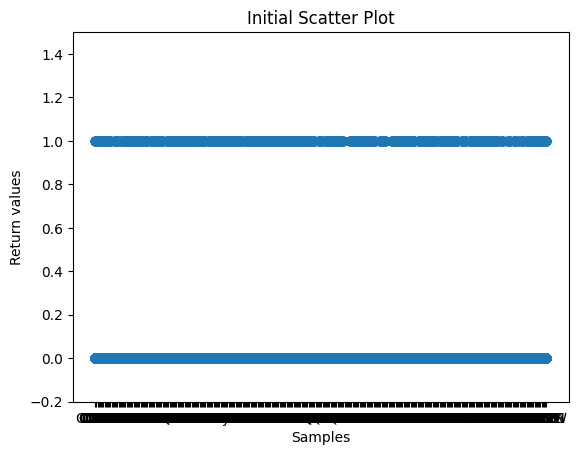

In [7]:
# First attemp for a simple visualization of our data set
# This first plot is not insightful but we can see that our return column in dataset may have 3 different values: 0,1, Nan
# Create the figure and axes:
fig, ax = plt.subplots()
x_values = data['company']  # Data points for the x-axis
y_values = data['Returns']  # Data points for the y-axis
ax.scatter(x_values, y_values)
ax.set_xlabel('Samples')
ax.set_ylabel('Return values')
ax.set_title('Initial Scatter Plot')
ax.set_ylim(-.2, 1.5)  # Set the limits for the y-axis
plt.show()



In [8]:
# Calculating the number of missing values in our Return (Target) column
# At this part we can see that 15990 of our samples do not have Target value
column_name = 'Returns'
nan_count = data[column_name].isna().sum()
print("Number of missing Return values:", nan_count)

Number of missing Return values: 15990


In [9]:
# Calculating the Percentatage of missing Return values in oeder to learn more about our dataset
size = data.shape[0]
print(f"{nan_count/size *100} % of our data set Return column is empty")

16.2844223562001 % of our data set Return column is empty


In [10]:
# We make a copy of our original dataset to implement our first preprossesing step
# It is a good approach to save all different type of data set instead of re-writing them 
data_1 = data.copy()

In [11]:
# Removing all rows which their return value is empty
data_1 = data_1.dropna(subset=['Returns'])
nan_count_1 = data_1['Returns'].isna().sum()
print(f"Number of empty Return rows in out new dataset is = {nan_count_1} and now size of it is = {data_1.shape[0]} ")

Number of empty Return rows in out new dataset is = 0 and now size of it is = 82202 


In [12]:
# Get the list of all column names 
columns = data_1.columns
columns

Index(['company', 'age', 'market', 'year', 'month', 'day', 'hour', 'minute',
       'volume', 'high', 'low', 'close', 'open', 'AVERAGE_SMA_3_CLOSE',
       'EMA_3_CLOSE', 'MACD_3_CLOSE', 'AVERAGE_SMA_3_OPENHIGH',
       'EMA_3_OPENHIGH', 'MACD_3_OPENHIGH', 'AVERAGE_SMA_3_HIGHLOW',
       'EMA_3_HIGHLOW', 'MACD_3_HIGHLOW', 'AVERAGE_SMA_3_VOLUME',
       'EMA_3_VOLUME', 'MACD_3_VOLUME', 'AVERAGE_SMA_4_CLOSE', 'EMA_4_CLOSE',
       'MACD_4_CLOSE', 'AVERAGE_SMA_4_OPENHIGH', 'EMA_4_OPENHIGH',
       'MACD_4_OPENHIGH', 'AVERAGE_SMA_4_HIGHLOW', 'EMA_4_HIGHLOW',
       'MACD_4_HIGHLOW', 'AVERAGE_SMA_4_VOLUME', 'EMA_4_VOLUME',
       'MACD_4_VOLUME', 'AVERAGE_SMA_7_CLOSE', 'EMA_7_CLOSE', 'MACD_7_CLOSE',
       'AVERAGE_SMA_7_OPENHIGH', 'EMA_7_OPENHIGH', 'MACD_7_OPENHIGH',
       'AVERAGE_SMA_7_HIGHLOW', 'EMA_7_HIGHLOW', 'MACD_7_HIGHLOW',
       'AVERAGE_SMA_7_VOLUME', 'EMA_7_VOLUME', 'MACD_7_VOLUME',
       'AVERAGE_SMA_20_CLOSE', 'EMA_20_CLOSE', 'MACD_20_CLOSE',
       'AVERAGE_SMA_20_OPENHIGH

In [13]:
# Identify the numeric columns in the dataset for normalizing the numerical features
# We need to pay attention that we do not want to normalize our Retuen column so we drop it
numeric_columns = data_1.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop(['Returns'])
numeric_columns

Index(['age', 'year', 'month', 'day', 'hour', 'minute', 'volume', 'high',
       'low', 'close', 'open', 'AVERAGE_SMA_3_CLOSE', 'EMA_3_CLOSE',
       'MACD_3_CLOSE', 'AVERAGE_SMA_3_OPENHIGH', 'EMA_3_OPENHIGH',
       'MACD_3_OPENHIGH', 'AVERAGE_SMA_3_HIGHLOW', 'EMA_3_HIGHLOW',
       'MACD_3_HIGHLOW', 'AVERAGE_SMA_3_VOLUME', 'EMA_3_VOLUME',
       'MACD_3_VOLUME', 'AVERAGE_SMA_4_CLOSE', 'EMA_4_CLOSE', 'MACD_4_CLOSE',
       'AVERAGE_SMA_4_OPENHIGH', 'EMA_4_OPENHIGH', 'MACD_4_OPENHIGH',
       'AVERAGE_SMA_4_HIGHLOW', 'EMA_4_HIGHLOW', 'MACD_4_HIGHLOW',
       'AVERAGE_SMA_4_VOLUME', 'EMA_4_VOLUME', 'MACD_4_VOLUME',
       'AVERAGE_SMA_7_CLOSE', 'EMA_7_CLOSE', 'MACD_7_CLOSE',
       'AVERAGE_SMA_7_OPENHIGH', 'EMA_7_OPENHIGH', 'MACD_7_OPENHIGH',
       'AVERAGE_SMA_7_HIGHLOW', 'EMA_7_HIGHLOW', 'MACD_7_HIGHLOW',
       'AVERAGE_SMA_7_VOLUME', 'EMA_7_VOLUME', 'MACD_7_VOLUME',
       'AVERAGE_SMA_20_CLOSE', 'EMA_20_CLOSE', 'MACD_20_CLOSE',
       'AVERAGE_SMA_20_OPENHIGH', 'EMA_20_OPENHIGH',

In [14]:
# Extract the numeric features from the dataset
numeric_features = data_1[numeric_columns]

In [15]:
# In order to do out next step of our preprocessing we make a new copy of our last modified dataset
data_2 = data_1.copy()

In [16]:
# By using the sklearn we try to normalize all the numeric features in the dataset
ss = StandardScaler()
ss.fit(numeric_features)
numeric_features = ss.transform(numeric_features)
data_2[numeric_columns] = numeric_features
data_2

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,Returns
21,CNDT,-1.722960,NASDAQ,0.0,1.757126,-0.642298,0.276546,0.0,0.004318,0.057621,...,-0.384961,-0.373394,-0.042554,-0.040466,-1.268334,0.312451,0.0,0.0,-0.138137,0.0
22,CNDT,-1.706540,NASDAQ,0.0,1.757126,-0.756660,0.276546,0.0,0.160323,-0.084690,...,-0.384961,-0.373394,-0.042554,-0.036206,-0.483961,1.167414,0.0,0.0,-0.136718,0.0
23,CNDT,-1.690121,NASDAQ,0.0,1.757126,-0.871023,0.276546,0.0,0.066152,-0.084687,...,-0.384961,-0.373394,-0.064460,-0.045114,0.391901,0.424754,0.0,0.0,-0.137498,0.0
24,CNDT,-1.673702,NASDAQ,0.0,1.757126,-1.214111,-3.616032,0.0,0.450531,-0.084678,...,-0.384961,-0.373394,-0.042554,-0.048976,0.652597,-1.696531,0.0,0.0,-0.133696,0.0
25,CNDT,-1.657282,NASDAQ,0.0,1.757126,-1.328474,-3.616032,0.0,-0.018622,-0.084667,...,-0.384961,-0.376253,-0.020649,-0.071086,1.530778,-1.356589,0.0,0.0,-0.137883,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98167,GRTS,1.659444,NASDAQ,0.0,-1.693851,0.386966,0.276546,0.0,11.146659,-0.084314,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.138147,0.0
98168,GRTS,1.675864,NASDAQ,0.0,-1.693851,-0.070484,0.276546,0.0,-0.084958,-0.084681,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.138147,1.0
98169,GRTS,1.692283,NASDAQ,0.0,-1.693851,-0.184847,0.276546,0.0,-0.144006,-0.084690,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.138147,1.0
98170,GRTS,1.708702,NASDAQ,0.0,-1.693851,-0.299210,0.276546,0.0,-0.150507,-0.084697,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.138147,1.0


In [17]:
# Identify the categorical columns in order to tranform categorical features into binary features
categorical_columns = data_2.select_dtypes(include=['object']).columns

In [18]:
# In order to do out next step of our preprocessing we make a new copy of our last modified dataset
data_3 = data_2.copy()

In [19]:
# Perform dummy encoding
data_3 = pd.get_dummies(data_3, columns=categorical_columns)
data_3

,age,year,month,day,hour,minute,volume,high,low,close,...,company_GPRO,company_GRAY,company_GRBK,company_GRFS,company_GRIL,company_GRIN,company_GRMN,company_GROW,company_GRTS,market_NASDAQ
21,-1.722960,0.0,1.757126,-0.642298,0.276546,0.0,0.004318,0.057621,-0.093556,-0.072475,...,False,False,False,False,False,False,False,False,False,True
22,-1.706540,0.0,1.757126,-0.756660,0.276546,0.0,0.160323,-0.084690,-0.093559,-0.072429,...,False,False,False,False,False,False,False,False,False,True
23,-1.690121,0.0,1.757126,-0.871023,0.276546,0.0,0.066152,-0.084687,-0.093551,-0.072417,...,False,False,False,False,False,False,False,False,False,True
24,-1.673702,0.0,1.757126,-1.214111,-3.616032,0.0,0.450531,-0.084678,-0.093548,-0.072383,...,False,False,False,False,False,False,False,False,False,True
25,-1.657282,0.0,1.757126,-1.328474,-3.616032,0.0,-0.018622,-0.084667,0.113307,-0.072131,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98167,1.659444,0.0,-1.693851,0.386966,0.276546,0.0,11.146659,-0.084314,-0.093508,-0.067454,...,False,False,False,False,False,False,False,False,True,True
98168,1.675864,0.0,-1.693851,-0.070484,0.276546,0.0,-0.084958,-0.084681,-0.093556,-0.072328,...,False,False,False,False,False,False,False,False,True,True
98169,1.692283,0.0,-1.693851,-0.184847,0.276546,0.0,-0.144006,-0.084690,0.077841,1.753466,...,False,False,False,False,False,False,False,False,True,True
98170,1.708702,0.0,-1.693851,-0.299210,0.276546,0.0,-0.150507,-0.084697,-0.093564,-0.072518,...,False,False,False,False,False,False,False,False,True,True


In [20]:
# Fill all NaN values in the dataset with a specific value, here with 0
# In order to do out next step of our preprocessing we make a new copy of our last modified dataset
# Now data_4 is a well preprossesed dataset and we can feed it into our model
data_4 = data_3.copy()
data_4 = data_4.fillna(value=0)
data_4

,age,year,month,day,hour,minute,volume,high,low,close,...,company_GPRO,company_GRAY,company_GRBK,company_GRFS,company_GRIL,company_GRIN,company_GRMN,company_GROW,company_GRTS,market_NASDAQ
21,-1.722960,0.0,1.757126,-0.642298,0.276546,0.0,0.004318,0.057621,-0.093556,-0.072475,...,False,False,False,False,False,False,False,False,False,True
22,-1.706540,0.0,1.757126,-0.756660,0.276546,0.0,0.160323,-0.084690,-0.093559,-0.072429,...,False,False,False,False,False,False,False,False,False,True
23,-1.690121,0.0,1.757126,-0.871023,0.276546,0.0,0.066152,-0.084687,-0.093551,-0.072417,...,False,False,False,False,False,False,False,False,False,True
24,-1.673702,0.0,1.757126,-1.214111,-3.616032,0.0,0.450531,-0.084678,-0.093548,-0.072383,...,False,False,False,False,False,False,False,False,False,True
25,-1.657282,0.0,1.757126,-1.328474,-3.616032,0.0,-0.018622,-0.084667,0.113307,-0.072131,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98167,1.659444,0.0,-1.693851,0.386966,0.276546,0.0,11.146659,-0.084314,-0.093508,-0.067454,...,False,False,False,False,False,False,False,False,True,True
98168,1.675864,0.0,-1.693851,-0.070484,0.276546,0.0,-0.084958,-0.084681,-0.093556,-0.072328,...,False,False,False,False,False,False,False,False,True,True
98169,1.692283,0.0,-1.693851,-0.184847,0.276546,0.0,-0.144006,-0.084690,0.077841,1.753466,...,False,False,False,False,False,False,False,False,True,True
98170,1.708702,0.0,-1.693851,-0.299210,0.276546,0.0,-0.150507,-0.084697,-0.093564,-0.072518,...,False,False,False,False,False,False,False,False,True,True


In [21]:
# Split the data into features (X) and target variable (y)
# Return is the last column in our dataset and we consider it as our target which we want to predict in our model
# X is a dataframe that only includes our model features
# y is a single row datatable that contains our dataset targets
X = data_4.drop('Returns', axis=1)
y = data_4['Returns']

In [22]:
# Create a Random Forest Classifier to find features with low level of effect on our Target
model = RandomForestClassifier()

# Fit the model on the data
model.fit(X, y)

# Get feature importances
importance_scores = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances)



                         Feature  Importance
0                            age    0.027434
48                  EMA_20_CLOSE    0.021768
56         AVERAGE_SMA_20_VOLUME    0.021516
47          AVERAGE_SMA_20_CLOSE    0.018999
44          AVERAGE_SMA_7_VOLUME    0.018993
..                           ...         ...
5                         minute    0.000000
71       DAYS_UNTIL_END_OF_MONTH    0.000000
72   DAYS_UNTIL_END_OF_TRIMESTER    0.000000
1                           year    0.000000
464                market_NASDAQ    0.000000

[465 rows x 2 columns]


In [23]:
# Remove features with low importance (e.g., importance scores below a threshold)
threshold = 0.02
selected_features = feature_importances[feature_importances['Importance'] >= threshold]['Feature']

# Create a new feature matrix with selected features
X_selected = X[selected_features]

# Use X_selected for further analysis or modeling
# Now instaed of having 466 feature column we have 49 features that are more important
X_selected

,age,EMA_20_CLOSE,AVERAGE_SMA_20_VOLUME
21,-1.722960,-0.191834,-0.034476
22,-1.706540,-0.191561,-0.041740
23,-1.690121,-0.191356,-0.066685
24,-1.673702,-0.191219,-0.083394
25,-1.657282,-0.191014,-0.131423
...,...,...,...
98167,1.659444,-0.199564,0.855650
98168,1.675864,-0.206130,-0.112795
98169,1.692283,-0.207225,-0.119265
98170,1.708702,-0.208182,-0.121028


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [25]:
# Now we create a LogisticRegression model because ou model is supervised with discrete outputs
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)


LogisticRegression()

In [26]:
# make predictions on new or unseen data
# instead of x_test here we can use our real world data to do prediction by help og our model
y_pred = model_2.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
# also we can calculate the probability of new data prediction
predicted_probability = model_2.predict_proba(X_test)
predicted_probability

array([[0.91093295, 0.08906705],
       [0.9640589 , 0.0359411 ],
       [0.96058095, 0.03941905],
       ...,
       [0.94737071, 0.05262929],
       [0.85722602, 0.14277398],
       [0.96668784, 0.03331216]])

In [28]:
# compute a confusion matrix, which is a common evaluation metric for classification models
"""
A confusion matrix is a table that summarizes the performance of a classification model by counting the number of true positives
, true negatives, false positives, and false negatives. It provides insights into the model's ability to correctly classify
different classes and helps assess the model's performance in terms of accuracy, precision, recall, and other metrics.

The resulting confusion matrix can be further analyzed to derive metrics such as accuracy, precision, recall, F1-score,
and more. It provides a detailed breakdown of how well the model is performing in terms of correctly and incorrectly
predicting the different classes in the classification problem.
"""
print(confusion_matrix(y_test, y_pred))

[[15533     0]
 [  908     0]]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     15533
         1.0       0.00      0.00      0.00       908

    accuracy                           0.94     16441
   macro avg       0.47      0.50      0.49     16441
weighted avg       0.89      0.94      0.92     16441



c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mohammad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Accuracy, precision, recall, and F1-score are commonly used performance metrics to evaluate the performance of a classification model. Here's a brief explanation of each metric:

Accuracy:
Accuracy measures the overall correctness of the model's predictions by comparing the number of correct predictions to the total number of predictions. It is calculated as:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
where TP (True Positive) is the number of correctly predicted positive instances, TN (True Negative) is the number of correctly predicted negative instances, FP (False Positive) is the number of falsely predicted positive instances, and FN (False Negative) is the number of falsely predicted negative instances. Accuracy provides a general overview of the model's performance but can be misleading if the dataset is imbalanced.

Precision:
Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It is calculated as:
Precision = TP / (TP + FP)
Precision focuses on the accuracy of positive predictions. It indicates the model's ability to minimize false positives and is useful in scenarios where the cost of false positives is high.

Recall (Sensitivity):
Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It is calculated as:
Recall = TP / (TP + FN)
Recall focuses on the model's ability to capture all positive instances without missing any. It is useful when the cost of false negatives (missing positive instances) is high.

F1-score:
The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. It is calculated as:
F1-score = 2 * (Precision * Recall) / (Precision + Recall)
The F1-score combines precision and recall into a single metric. It is useful when you want to consider both false positives and false negatives and seek a balance between precision and recall.

When interpreting these metrics, consider the specific requirements and goals of your classification problem. A high accuracy indicates overall correctness, while high precision and recall indicate better performance in specific aspects (e.g., minimizing false positives or capturing all positive instances). The F1-score provides a balanced assessment of precision and recall. Choose the metric(s) that align with your priorities and problem context to evaluate the performance of your classification model effectively.

A F1-score of 0.97 is generally considered an excellent result for a classification model. The F1-score ranges from 0 to 1, where 1 represents perfect precision and recall. A score of 0.97 indicates that the model has achieved a high balance between precision and recall.

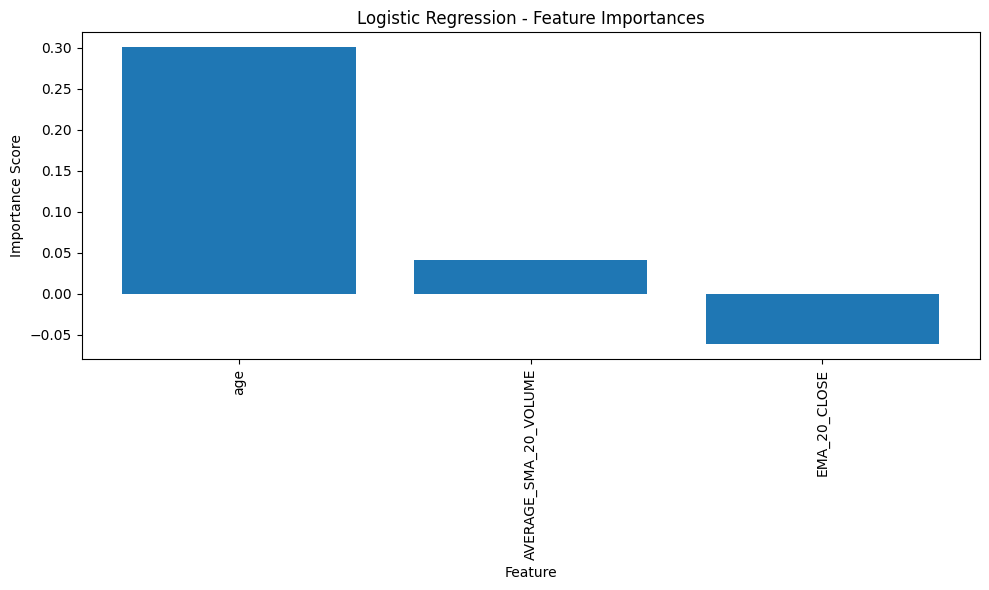

In [30]:
"""
Feature Importance Plot:
This example computes the feature importances using model.coef_ and then sorts and plots them in descending order 
using a bar plot. The feature names are displayed on the x-axis, and the importance scores are shown on the y-axis.
"""
# Get the feature importances
importance_scores = model_2.coef_[0]

# Sort the feature importances in descending order
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_importances = importance_scores[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected.shape[1]), sorted_importances)
plt.xticks(range(X_selected.shape[1]), X_selected.columns[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Logistic Regression - Feature Importances')
plt.tight_layout()
plt.show()

